In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [0]:
## 의사결정트리

# 나무 모양의 그래프를 사용해서 최적의 결정을 돕는 분석기법
# 기회비용에 대한 고려, 기대 이익 계산, 위험 관리등
# 효율적인 결정이 필요한 많은 분야에 사용되고 있음

# 의사결정트리는 회귀,분류에 사용되지만
# 주로 분류에 많이 이용되고 있음


# 의사결정트리 결정영역을 표시하기 위해 
# mlxtend 패키지 설치함
# pip install mlxtend

from mlxtend.plotting import plot_decision_regions


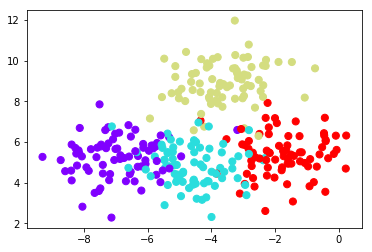

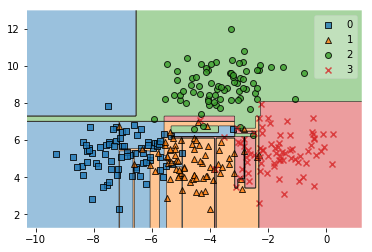

훈련정확도 1.0


In [9]:
# 예제 데이터 생성

X, y = make_blobs(n_samples=300, centers=4, 
                  cluster_std=1.0, random_state=1907081430)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=50)
plt.show()



# 의사결정트리로 분류하고 결정영역 표기하기
dtc = DecisionTreeClassifier()
dtc.fit(X, y)

plot_decision_regions(X, y, clf=dtc)
plt.show()

print('훈련정확도', dtc.score(X, y))



정확도 0.8933333333333333


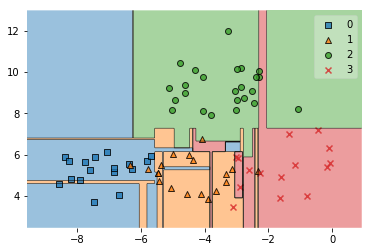

In [10]:
# 훈련/검증 데이터 분리 및 학습
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=1907081500)

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)


# 분석결과 평가
print('정확도', accuracy_score(pred, y_test))
confusion_matrix(pred, y_test)

plot_decision_regions(X_test, y_test, clf=dtc)
plt.show()


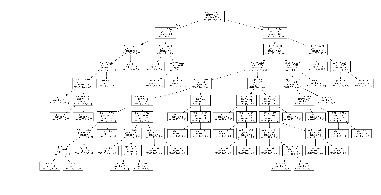

In [11]:
# 의사결정나무 분류 결과를 그래프로 출력하려면 
# graphviz 라는 라이브러리 필요!

# graphviz.org => stable 2.38 windows => graphviz-2.38.zip 
# => c:/Java 아래에 압축해제 
# => 폴더명 graphviz-2.38 변경 
# => bin 폴더를 PATH 환경변수로 등록



## 의사결정트리 시각화
# pydotplus 패키지 설치
# pip install pydotplus

import pydotplus
from sklearn import tree


dot_data = tree.export_graphviz(dtc, out_file=None)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_pdf('blobs.pdf')   # pdf 출력
graph.write_png('blobs.png')   # png 출력


# 의사결정나무 그림파일 출력
import matplotlib.image as pltimg

img = pltimg.imread('blobs.png')
plt.imshow(img)
plt.axis('off')
plt.show()



In [12]:
# iris 데이터 셋을 이용한 의사결정트리 분석
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap


# 데이터 적재 
iris = load_iris()

data = iris.data
target = iris.target


# 의사결정트리 분석
dtc2 = DecisionTreeClassifier(criterion='entropy', max_depth=4)
# criterion : 정보이득 알고리즘 지정
# max_depth : 의사결정트리의 가지수 조정

dtc2.fit(data, target)

print('훈련정확도', dtc2.score(data, target))




훈련정확도 0.9933333333333333


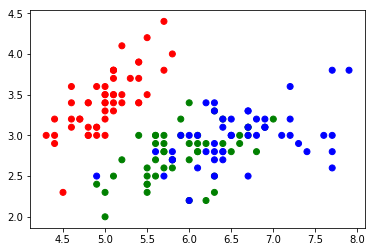

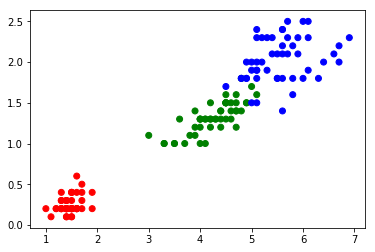

In [13]:
# 의사결정트리 분석 결과 시각화 산점도
plt.scatter(data[:, 0], data[:, 1], 
            c=target, cmap=ListedColormap(['r', 'g', 'b']))
plt.show()   # Sepal width/length


plt.scatter(data[:, 2], data[:, 3], 
            c=target, cmap=ListedColormap(['r', 'g', 'b']))
plt.show()   # Petal width/length



In [37]:
# 시각화
# dot_tree = tree.export_graphviz(dtc2, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)

# graph = pydotplus.graph_from_dot_data(dot_data)
# graph.write_pdf('iris.pdf')
# graph.write_png('iris.png')

dot_data = tree.export_graphviz(dtc2, out_file=None, feature_names=iris.feature_names,
                                class_names=iris.target_names, filled=True, rounded=True)
praph = pydotplus.graph_from_dot_data(dot_data)
praph.write_pdf('iris.pdf')
praph.write_png('iris.png')

True

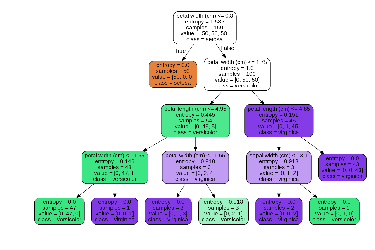

In [38]:
# 의사결정나무 그림파일 출력
img = pltimg.imread('iris.png')
plt.imshow(img)
plt.axis('off')
plt.show()

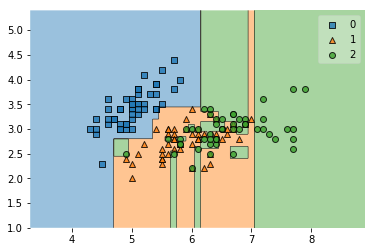

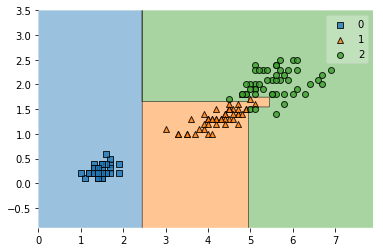

In [39]:
# 결정영역 시각화
xdata = iris.data[:, [0, 1]]
dtc.fit(xdata, target)
plot_decision_regions(xdata, target, clf=dtc)
plt.show()

xdata = iris.data[:, [2, 3]]
dtc.fit(xdata, target)
plot_decision_regions(xdata, target, clf=dtc)
plt.show()
